# Are you being sarcastic? 

In this tutorial, we are going through the basis steps to build a text classifier:     

1.    Dataset: Loading and splitting data into train and test sets.
2.    Tokenization: How to represent words in a way that a computer can process them?
3.    Design and train the deep model with embeddings
4.    Evaluate on new arbitrary sentences    

This code is based on [Coding TensorFlow](https://youtu.be/Y_hzMnRXjhI) 


By [Ibrahim Sobh](https://www.linkedin.com/in/ibrahim-sobh-phd-8681757/)

In [14]:
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt

In [15]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000
num_epochs = 15

## Dataset: Loading and splitting data into train and test sets.

In [16]:
with open("data/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [17]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Tokenization: How to represent words in a way that a computer can process them?

In [18]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [19]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Design and train the deep model with embeddings

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/15
625/625 - 1s - loss: 0.6795 - accuracy: 0.5637 - val_loss: 0.6513 - val_accuracy: 0.7450
Epoch 2/15
625/625 - 1s - loss: 0.4844 - accuracy: 0.7904 - val_loss: 0.3977 - val_accuracy: 0.8313
Epoch 3/15
625/625 - 1s - loss: 0.3263 - accuracy: 0.8686 - val_loss: 0.3689 - val_accuracy: 0.8360
Epoch 4/15
625/625 - 1s - loss: 0.2722 - accuracy: 0.8924 - val_loss: 0.3438 - val_accuracy: 0.8571
Epoch 5/15
625/625 - 1s - loss: 0.2353 - accuracy: 0.9086 - val_loss: 0.3413 - val_accuracy: 0.8566
Epoch 6/15
625/625 - 1s - loss: 0.2079 - accuracy: 0.9193 - val_loss: 0.3571 - val_accuracy: 0.8469
Epoch 7/15
625/625 - 1s - loss: 0.1843 - accuracy: 0.9296 - val_loss: 0.3679 - val_accuracy: 0.8486
Epoch 8/15
625/625 - 1s - loss: 0.1649 - accuracy: 0.9383 - val_loss: 0.3720 - val_accuracy: 0.8517
Epoch 9/15
625/625 - 1s - loss: 0.1505 - accuracy: 0.9456 - val_loss: 0.3876 - val_accuracy: 0.8492
Epoch 10/15
625/625 - 1s - loss: 0.1351 - accuracy: 0.9525 - val_loss: 0.4033 - val_accuracy: 0.8487

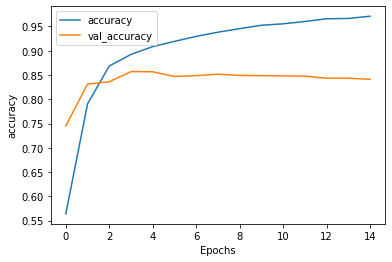

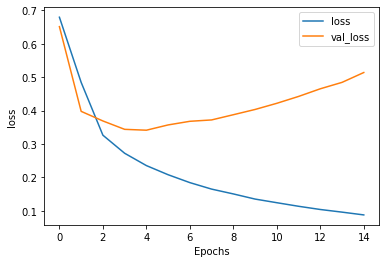

In [22]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Evaluate on new arbitrary sentences

In [23]:
sentence = ["country music protested in restaurant's kitchen", "deadly stabbing attack at maryland prayer center"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.979181e-01]
 [5.514324e-04]]


In [24]:
# order does not matter 
sentence = ["kitchen music protested in country restaurant's", "maryland prayer deadly at stabbing center attack"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.979181e-01]
 [5.514324e-04]]


In [25]:
sentence = ["hey squish.", "thanks for not just telling me it was 'all in my head.'", "a. i wasnt shoplifting.,", "and b., the phrase 'we pay for that, dont we?'", "is not a normal phrase.", "appreciate your input, but i disagree."]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.18406245]
 [0.32157135]
 [0.00381568]
 [0.45743   ]
 [0.47472554]
 [0.00247428]]


In [26]:
proba = model.predict(padded)
(proba > 0.5).any()

False